In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = {'Age': [22, 25, 47, 52, 46, 56, 56, 23, 28, 32],

'Salary': [15000, 18000, 40000, 45000, 30000, 60000, 95000, 20000, 25000, 30000],

'Purchased': [0, 0, 1, 1, 1, 1, 1, 0, 0, 0]
}

df = pd.DataFrame (data)

In [ ]:
X = df[['Age', 'Salary']]
y = df['Purchased']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [ ]:
print("\nClassification Report: \n", classification_report(y_test, y_pred))


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



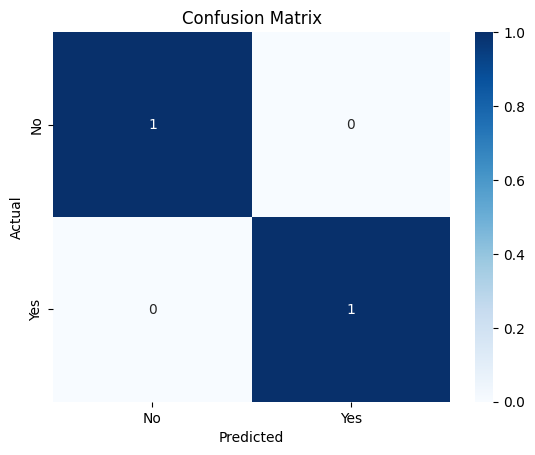

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Task
Modify the existing dataset by adding a new feature named 'Experience' and additional data points to change the class distribution. After modifying the dataset, update the feature matrix `X` and target variable `y`, re-split the data into training and testing sets, re-train the Gaussian Naive Bayes model, and re-evaluate its performance by calculating accuracy, precision, recall, and F1 score. Generate and print the classification report, plot the confusion matrix, and finally, provide a comprehensive discussion of how these changes affected the model's performance.

## Modify Dataset

### Subtask:
Add a new feature 'Experience' to the DataFrame and change the class distribution by adding more data points.


**Reasoning**:
First, I will create a list of 'Experience' values and add it as a new column to the existing DataFrame `df`.



In [ ]:
experience_values = [1, 2, 20, 25, 18, 30, 30, 1, 3, 7]
df['Experience'] = experience_values
print("DataFrame with new 'Experience' column:")
print(df.head())

DataFrame with new 'Experience' column:
   Age  Salary  Purchased  Experience
0   22   15000          0           1
1   25   18000          0           2
2   47   40000          1          20
3   52   45000          1          25
4   46   30000          1          18


**Reasoning**:
Now I will create additional data points to alter the class distribution, specifically adding more instances where 'Purchased' is 0, and convert them into a DataFrame.



In [ ]:
new_data = {
    'Age': [30, 35, 40, 28, 23, 60, 58],
    'Salary': [28000, 32000, 35000, 22000, 19000, 70000, 80000],
    'Purchased': [0, 0, 0, 0, 0, 1, 1],
    'Experience': [5, 8, 10, 3, 2, 35, 33]
}

new_df = pd.DataFrame(new_data)
print("New data points DataFrame:")
print(new_df)

New data points DataFrame:
   Age  Salary  Purchased  Experience
0   30   28000          0           5
1   35   32000          0           8
2   40   35000          0          10
3   28   22000          0           3
4   23   19000          0           2
5   60   70000          1          35
6   58   80000          1          33


**Reasoning**:
I will concatenate the original DataFrame `df` with the `new_df` containing additional data points to create an updated `df` that includes the new 'Experience' feature and modified class distribution.



In [ ]:
df = pd.concat([df, new_df], ignore_index=True)
print("Updated DataFrame after concatenation:")
print(df.head(15))

Updated DataFrame after concatenation:
    Age  Salary  Purchased  Experience
0    22   15000          0           1
1    25   18000          0           2
2    47   40000          1          20
3    52   45000          1          25
4    46   30000          1          18
5    56   60000          1          30
6    56   95000          1          30
7    23   20000          0           1
8    28   25000          0           3
9    32   30000          0           7
10   30   28000          0           5
11   35   32000          0           8
12   40   35000          0          10
13   28   22000          0           3
14   23   19000          0           2


## Update Features and Target

### Subtask:
Update the feature matrix (X) to include the new 'Experience' column, and ensure the target variable (y) is correctly defined with the updated dataset.


**Reasoning**:
I will update the feature matrix `X` to include the 'Age', 'Salary', and 'Experience' columns from the updated DataFrame `df`.



In [ ]:
X = df[['Age', 'Salary', 'Experience']]
print("Updated feature matrix X:")
print(X.head())

Updated feature matrix X:
   Age  Salary  Experience
0   22   15000           1
1   25   18000           2
2   47   40000          20
3   52   45000          25
4   46   30000          18


**Reasoning**:
I will update the target variable `y` by selecting the 'Purchased' column from the modified DataFrame `df`.



In [ ]:
y = df['Purchased']
print("Updated target variable y:")
print(y.head())

Updated target variable y:
0    0
1    0
2    1
3    1
4    1
Name: Purchased, dtype: int64


## Re-split Data

### Subtask:
Re-split the updated dataset into training and testing sets using `train_test_split`, ensuring `stratify=y` to maintain class distribution in both sets.


**Reasoning**:
I will re-split the updated dataset into training and testing sets using the `train_test_split` function with the specified parameters to ensure proper class distribution.



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Data successfully re-split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data successfully re-split into training and testing sets.
X_train shape: (13, 3)
X_test shape: (4, 3)
y_train shape: (13,)
y_test shape: (4,)


## Re-train Model

### Subtask:
Re-train the Gaussian Naive Bayes model using the updated training data (X_train, y_train).


**Reasoning**:
I will initialize a new Gaussian Naive Bayes model and then fit it to the updated training data (X_train, y_train).



In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)
print("Gaussian Naive Bayes model re-trained successfully.")

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)
print("Gaussian Naive Bayes model re-trained successfully.")
y_pred = model.predict(X_test)
print("Predictions generated successfully on the updated test set.")

Gaussian Naive Bayes model re-trained successfully.
Predictions generated successfully on the updated test set.


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Model performance metrics calculated successfully.")

Model performance metrics calculated successfully.


In [ ]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [ ]:
print("\nClassification Report: \n", classification_report(y_test, y_pred))


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



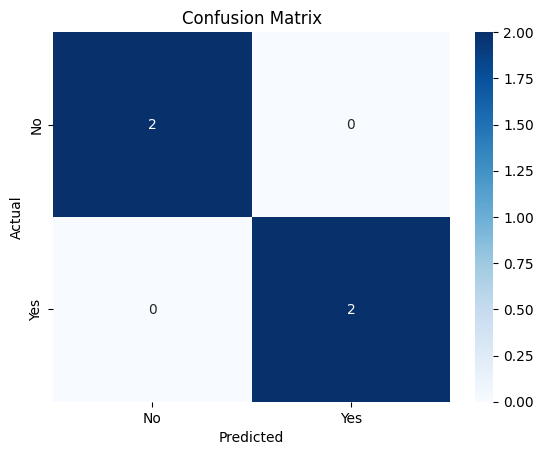

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
